# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress
from matplotlib.dates import DateFormatter

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Initiate Count
record_number = 0

# Set up lists to hold reponse info in dataframe
name_city = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []

# Print Header
print(f"Beginning Data Retrieval")
print(f"-----------------------------------------")

# Loop through the list of cities
for city in cities:    
    
    # Create search query, make request and store in json with a 2 second timer for pausing to avoid temporarily blocking my OpenWeatherMap API key
    weather_response = requests.get(query_url + str(city))
    weather_response_json = weather_response.json()
    time.sleep(2)   
    
    # Try to retrieve and store weather conditions into lists and if a random city is not found in the Open Weathermap then skip 
    try:
        name_city.append(weather_response_json["name"])
        country.append(weather_response_json["sys"]["country"])
        date.append(weather_response_json["dt"])
        latitude.append(weather_response_json["coord"]["lat"])
        longitude.append(weather_response_json["coord"]["lon"])
        cloudiness.append(weather_response_json["clouds"]["all"])
        humidity.append(weather_response_json["main"]["humidity"])
        max_temp.append(weather_response_json["main"]["temp_max"])
        wind_speed.append(weather_response_json["wind"]["speed"])
                   
        print(f"Processing Record {record_number} | {city}")
        record_number += 1
               
    except:
        # Append null values
        print("City not found. Skipping...")

print(f"-----------------------------------------")
print(f"Data Retrieval Complete")

Beginning Data Retrieval
-----------------------------------------
Processing Record 0 | yarada
Processing Record 1 | hermanus
Processing Record 2 | vidim
Processing Record 3 | castro
Processing Record 4 | san pedro
City not found. Skipping...
Processing Record 5 | zhigansk
City not found. Skipping...
Processing Record 6 | willowmore
Processing Record 7 | bandarbeyla
City not found. Skipping...
Processing Record 8 | faya
Processing Record 9 | hilo
Processing Record 10 | vaini
Processing Record 11 | sitka
Processing Record 12 | cape town
Processing Record 13 | kaniama
Processing Record 14 | teya
Processing Record 15 | talaya
Processing Record 16 | camargo
Processing Record 17 | gorontalo
Processing Record 18 | mataura
Processing Record 19 | goderich
Processing Record 20 | ipira
Processing Record 21 | vila franca do campo
Processing Record 22 | beloha
Processing Record 23 | kuminskiy
Processing Record 24 | chihuahua
Processing Record 25 | clyde river
Processing Record 26 | qaanaaq
Proces

Processing Record 224 | kamenka
Processing Record 225 | manokwari
Processing Record 226 | sao felix do xingu
Processing Record 227 | bairiki
Processing Record 228 | broome
Processing Record 229 | kupang
City not found. Skipping...
Processing Record 230 | awbari
Processing Record 231 | sovetskiy
Processing Record 232 | puerto escondido
Processing Record 233 | kokopo
Processing Record 234 | ilulissat
Processing Record 235 | mineiros
Processing Record 236 | provideniya
Processing Record 237 | magnitogorsk
Processing Record 238 | dakar
Processing Record 239 | fortuna
Processing Record 240 | rocha
Processing Record 241 | canakkale
Processing Record 242 | illapel
Processing Record 243 | adrar
Processing Record 244 | pangnirtung
Processing Record 245 | torbat-e jam
Processing Record 246 | raga
Processing Record 247 | carnarvon
Processing Record 248 | kruisfontein
City not found. Skipping...
Processing Record 249 | vung tau
Processing Record 250 | abha
Processing Record 251 | auki
Processing R

Processing Record 454 | teeli
Processing Record 455 | alexandria
Processing Record 456 | mount isa
Processing Record 457 | back mountain
Processing Record 458 | batagay
Processing Record 459 | kapit
Processing Record 460 | mahanoro
Processing Record 461 | sao jose da coroa grande
Processing Record 462 | tura
Processing Record 463 | beverley
Processing Record 464 | luganville
Processing Record 465 | preston
Processing Record 466 | kamaishi
Processing Record 467 | westport
Processing Record 468 | boyolangu
Processing Record 469 | bambanglipuro
Processing Record 470 | trebisacce
Processing Record 471 | opuwo
Processing Record 472 | glace bay
Processing Record 473 | poya
Processing Record 474 | deputatskiy
Processing Record 475 | krasnyy chikoy
Processing Record 476 | lazaro cardenas
Processing Record 477 | tongchuan
Processing Record 478 | canatlan
Processing Record 479 | sorland
Processing Record 480 | bilgi
Processing Record 481 | narsaq
Processing Record 482 | boguchany
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictionary and then place into a data frame from lists defined above

weather_dictionary = {"City": name_city,
                      "Country": country,
                      "Date": date,
                      "Latitude": latitude,
                      "Longitude": longitude,
                      "Cloudiness (%)": cloudiness,
                      "Humidity (%)": humidity,
                      "Max Temp (F)": max_temp,
                      "Wind Speed (mph)": wind_speed}

weather_data = pd.DataFrame(weather_dictionary)
weather_data["Date"] = pd.to_datetime(weather_data["Date"],unit='s')
weather_data.to_csv("weather_data_output.csv")
weather_data

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Yārāda,IN,2020-03-16 03:13:50,17.65,83.27,20,78,80.60,2.24
1,Hermanus,ZA,2020-03-16 03:13:52,-34.42,19.23,50,77,64.63,32.01
2,Vidim,RU,2020-03-16 03:13:55,56.41,103.11,92,91,28.47,8.81
3,Castro,BR,2020-03-16 03:13:57,-24.79,-50.01,13,86,65.79,3.42
4,City of San Pedro,PH,2020-03-16 03:13:59,14.35,121.02,75,62,86.00,5.82
...,...,...,...,...,...,...,...,...,...
554,Dingli,MT,2020-03-16 03:31:48,35.86,14.38,20,82,57.20,9.17
555,Lensk,RU,2020-03-16 03:30:15,60.73,114.93,100,89,30.42,12.08
556,Abriaquí,CO,2020-03-16 03:35:43,6.63,-76.06,74,92,57.29,0.92
557,Bontang,ID,2020-03-16 03:35:45,0.13,117.50,13,74,82.80,14.83


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

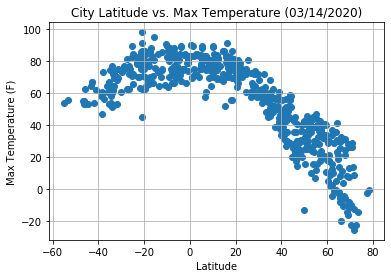

In [5]:
# Build a scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Max Temp (F)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("Fig. 01 (Latitude vs. Temperature).png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

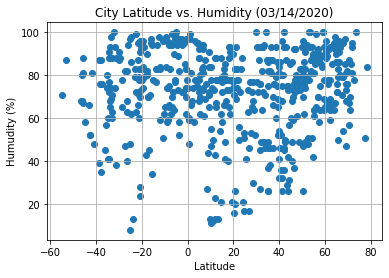

In [6]:
# Build a scatter plot 
plt.scatter(weather_data["Latitude"], weather_data["Humidity (%)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humudity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig. 02 (Latitude vs. Humidity).png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

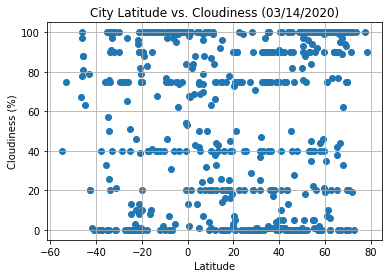

In [7]:
# Build a scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig. 03 (Latitude vs. Cloudiness).png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

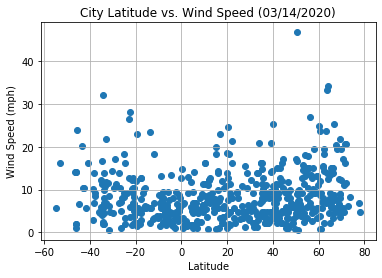

In [8]:
# Build a scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (mph)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("Fig. 04 (Latitude vs. Wind Speed).png")

# Show plot
plt.show()

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots


In [10]:
# Create Northern and Southern Hemisphere DataFrames

# Define variables to determine cities above and below the equator
northern_cities = weather_data["Latitude"] >= 0
southern_cities = weather_data["Latitude"] < 0

# Place the variables from above into DataFrames 
northern_weather = weather_data[northern_cities]
southern_weather = weather_data[southern_cities]

# Reset the index for each DataFrame
northern_weather = northern_weather.reset_index(drop=True)
southern_weather = southern_weather.reset_index(drop=True)
southern_weather.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Hermanus,ZA,2020-03-16 03:13:52,-34.42,19.23,50,77,64.63,32.01
1,Castro,BR,2020-03-16 03:13:57,-24.79,-50.01,13,86,65.79,3.42
2,Willowmore,ZA,2020-03-16 03:14:07,-33.29,23.49,100,88,52.57,6.29
3,Vaini,TO,2020-03-16 03:14:18,-21.20,-175.20,90,83,84.20,12.75
4,Cape Town,ZA,2020-03-16 03:10:43,-33.93,18.42,20,68,64.40,13.87


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The Correlation (R) between Latitude and Max Temperature (F) is: -0.91


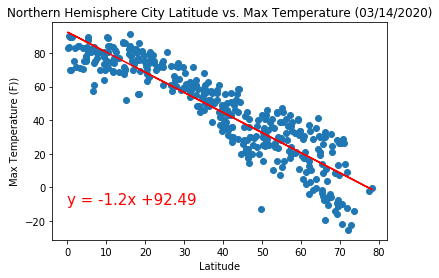

In [11]:
# Calculate the correlation coefficient and linear regression model for latitude and Temperature

# Define x-values by Latitude and y-values by Temperature into lists
x_values = northern_weather["Latitude"]
y_values = northern_weather["Max Temp (F)"]

# Perform a linear regression on latitude vs.Temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F))")
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Max Temperature (F) is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 05 (Northern Latitude vs. Temperature).png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The Correlation (R) between Latitude and Max Temperature (F) is: 0.63


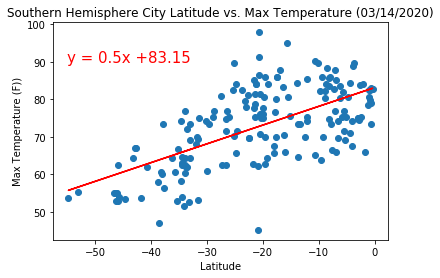

In [20]:
# Calculate the correlation coefficient and linear regression model for latitude and Temperature

# Define x-values by Latitude and y-values by Temperature into lists
x_values = southern_weather["Latitude"]
y_values = southern_weather["Max Temp (F)"]

# Perform a linear regression on latitude vs.Temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F))")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Max Temperature (F) is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 06 (Southern Latitude vs. Temperature).png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Correlation (R) between Latitude and Humidity is: 0.21


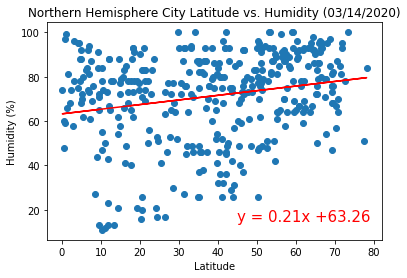

In [13]:
# Calculate the correlation coefficient and linear regression model for latitude and Humidity

# Define x-values by Latitude and y-values by Humidity into lists
x_values = northern_weather["Latitude"]
y_values = northern_weather["Humidity (%)"]

# Perform a linear regression on latitude vs.Humidity
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere City Latitude vs. Humidity (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Humidity is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 07 (Northern Latitude vs. Humidity).png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Correlation (R) between Latitude and Humidity is: 0.23


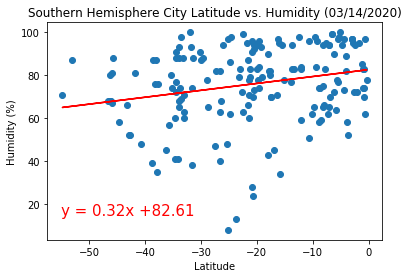

In [14]:
# Calculate the correlation coefficient and linear regression model for latitude and Humidity

# Define x-values by Latitude and y-values by Humidity into lists
x_values = southern_weather["Latitude"]
y_values = southern_weather["Humidity (%)"]

# Perform a linear regression on latitude vs.Humidity
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere City Latitude vs. Humidity (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Humidity is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 08 (Southern Latitude vs. Humidity).png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Correlation (R) between Latitude and Cloudiness is: 0.13


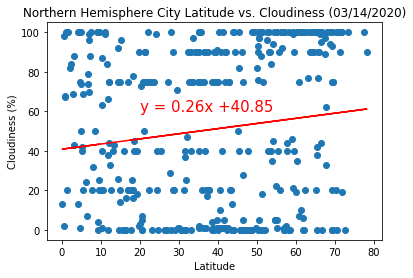

In [23]:
# Calculate the correlation coefficient and linear regression model for latitude and Cloudiness

# Define x-values by Latitude and y-values by Cloudiness into lists
x_values = northern_weather["Latitude"]
y_values = northern_weather["Cloudiness (%)"]

# Perform a linear regression on latitude vs.Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(20,60),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Cloudiness is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 09 (Northern Latitude vs. Cloudiness).png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Correlation (R) between Latitude and Cloudiness is: 0.21


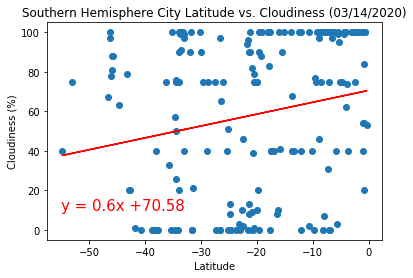

In [25]:
# Calculate the correlation coefficient and linear regression model for latitude and Cloudiness

# Define x-values by Latitude and y-values by Cloudiness into lists
x_values = southern_weather["Latitude"]
y_values = southern_weather["Cloudiness (%)"]

# Perform a linear regression on latitude vs.Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Cloudiness is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 10 (Southern Latitude vs. Cloudiness).png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Correlation (R) between Latitude and Wind Speed is: 0.23


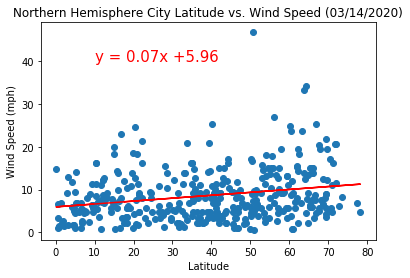

In [26]:
# Calculate the correlation coefficient and linear regression model for latitude and Wind Speed

# Define x-values by Latitude and y-values by Wind Speed into lists
x_values = northern_weather["Latitude"]
y_values = northern_weather["Wind Speed (mph)"]

# Perform a linear regression on latitude vs. Wind Speed
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Wind Speed is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 11 (Northern Latitude vs. Wind Speed).png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Correlation (R) between Latitude and Wind Speed is: -0.3


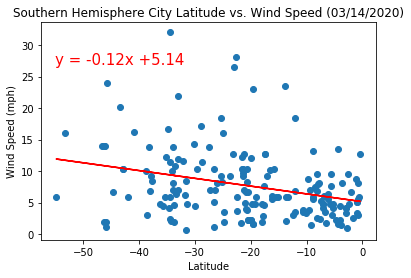

In [27]:
# Calculate the correlation coefficient and linear regression model for latitude and Wind Speed

# Define x-values by Latitude and y-values by Wind Speed into lists
x_values = southern_weather["Latitude"]
y_values = southern_weather["Wind Speed (mph)"]

# Perform a linear regression on latitude vs. Wind Speed
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(-55,27),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Wind Speed is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 12 (Southern Latitude vs. Wind Speed).png")

# Show plot
plt.show()